# Pymaceuticals Inc.
---

### Analysis

- In the background portion of this analysis, we are told that our company is trying to compare the performance of Capomulin to the other treatments in the experiment. From that perspective, we can see that Capomulin and Remicane are the two most effective treatments for lowering the size of the tumors in the mice. We saw in our summary statistics table that they have the two lowest mean tumor volumes. We can also see from our bar charts that these two treatments have the most timepoints, meaning their mice live longer. More specifically, the treatment of mouse l509 shows the dramatic decrease in tumor size as the treatment went on. All of this data shows that Capomulin, along with Remicane, is a more effective and potent treatment compared to the other regimens.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
len(merged_df['Mouse ID'].unique())

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 
duplicate_id = merged_df.loc[duplicate, 'Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_df.loc[merged_df["Mouse ID"] == 'g989', :]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop(merged_df[merged_df["Mouse ID"] == 'g989'].index)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

summary = pd.DataFrame({"Mean Tumor Volume" : mean, 
                        "Median Tumor Volume" : median, 
                        "Tumor Volume Variance" : variance,
                        "Tumor Volume Std. Dev.": std,
                        "Tumor Volume Std. Err.": sem})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
aggregate


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

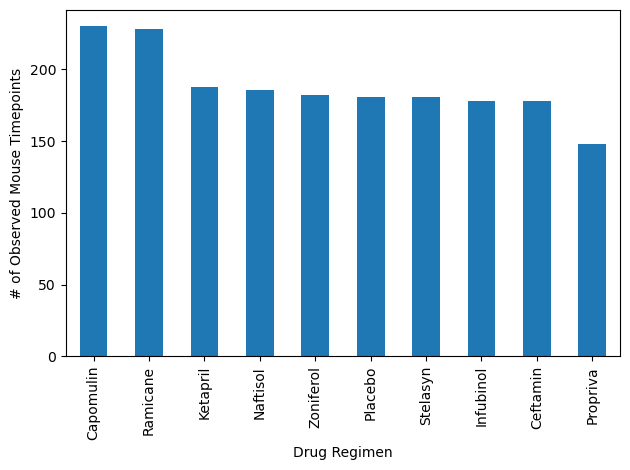

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_mice = clean_df["Drug Regimen"].value_counts()

drug_mice.plot(kind = 'bar', xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

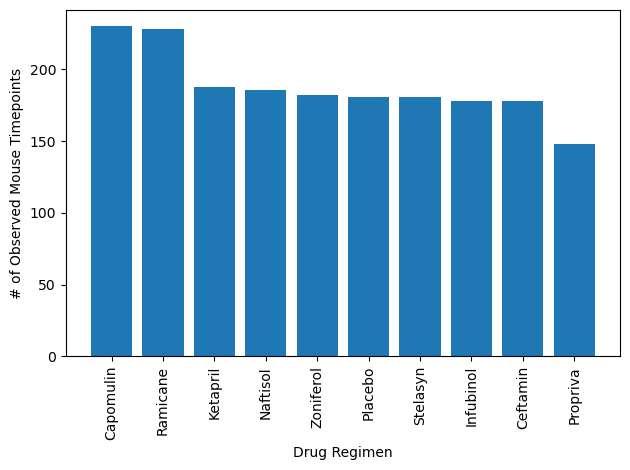

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_mice.index.values
y_axis = drug_mice.values
ticks = [x for x in x_axis]
plt.bar(x_axis, y_axis, align = 'center')
plt.xticks(ticks,rotation="vertical")

# Give our chart some labels and a tile
                
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()


<Axes: ylabel='count'>

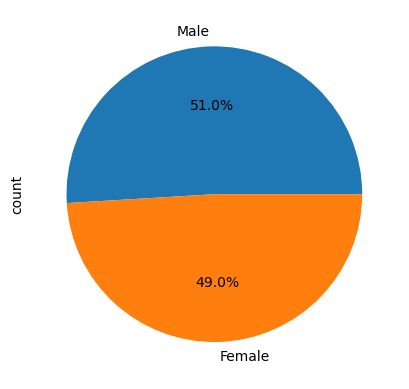

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df["Sex"].value_counts()
sex.plot(kind = 'pie', autopct = "%1.1f%%")


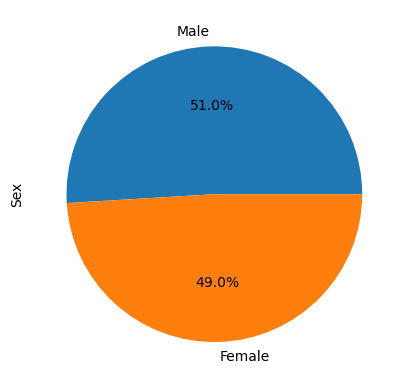

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_df["Sex"].value_counts()
labels = ["Male", "Female"]
plt.pie(sex, labels = labels, autopct = "%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint= clean_df.groupby("Mouse ID")["Timepoint"].max()
timepoint.reset_index

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
group_df = pd.merge(timepoint, clean_df, on = ("Mouse ID", "Timepoint"))
group_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
    # Determine outliers using upper and lower bounds
for x in treatments:
    drug = group_df.loc[group_df["Drug Regimen"] == x]
    volume = drug["Tumor Volume (mm3)"]
    tumor.append(volume)
    
    quartiles=drug["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper - lower
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    outliers = (volume.loc[(drug["Tumor Volume (mm3)"] > upper_bound)| (drug["Tumor Volume (mm3)"]< lower_bound)]).count() 
    
    print(f"{x}'s potential outliers: {outliers}")

Capomulin's potential outliers: 0
Ramicane's potential outliers: 0
Infubinol's potential outliers: 1
Ceftamin's potential outliers: 0


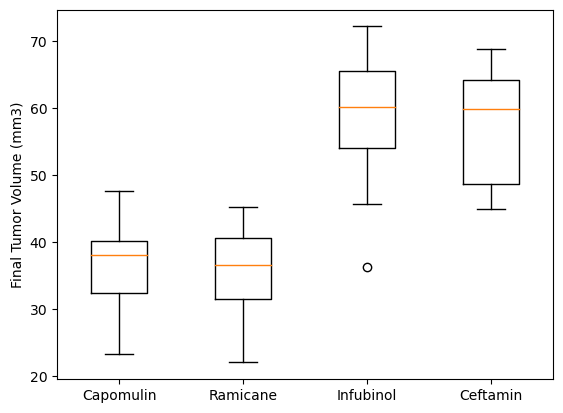

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.subplot().set_ylabel("Final Tumor Volume (mm3)")
plt.boxplot(tumor)
plt.xticks([1,2,3,4],treatments)
plt.show()

## Line and Scatter Plots

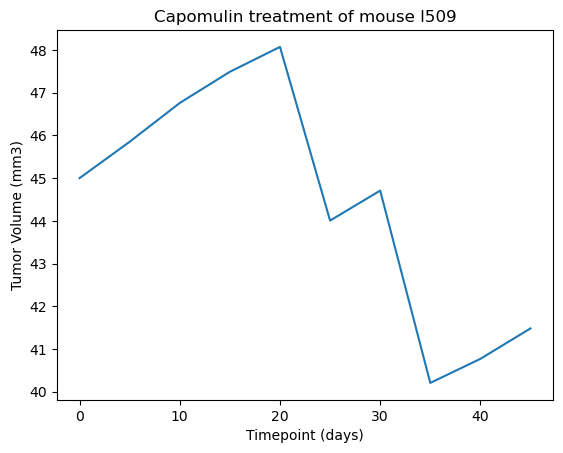

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = clean_df.loc[clean_df["Mouse ID"] == 'l509']
l509_vol = l509["Tumor Volume (mm3)"]
l509_time = l509["Timepoint"]

plt.plot(l509_time, l509_vol)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

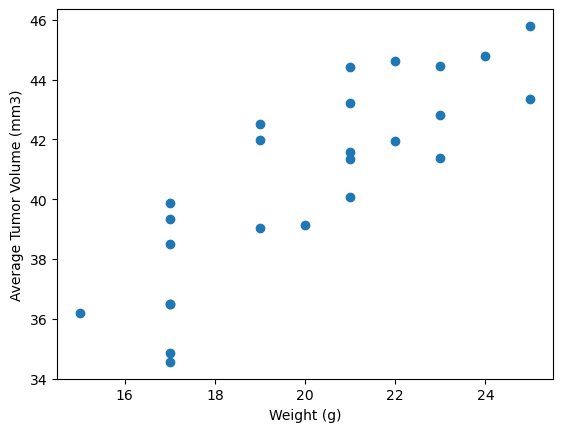

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_weight = cap.groupby("Mouse ID")["Weight (g)"].mean()
cap_vol = cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(cap_weight, cap_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)


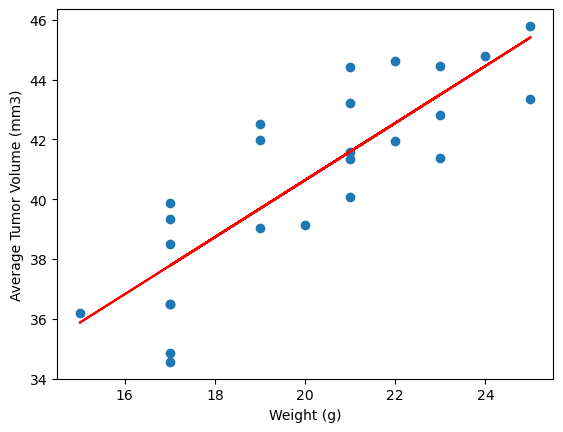

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(cap_weight, cap_vol)

plt.scatter(cap_weight, cap_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_weight, cap_vol)
regression = cap_weight* slope + intercept
plt.plot(cap_weight, regression, color="red")

print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
plt.show()